In [17]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import classification_report
from sklearn.preprocessing import StandardScaler
from sklearn.decomposition import PCA


In [3]:
df_train = pd.read_csv('dataset/UNSW_NB15_training-set.csv', encoding='latin1')
df_test = pd.read_csv('dataset/UNSW_NB15_testing-set.csv',  encoding='latin1')

In [8]:
set(df_train['attack_cat'])

{'Analysis',
 'Backdoor',
 'DoS',
 'Exploits',
 'Fuzzers',
 'Generic',
 'Normal',
 'Reconnaissance',
 'Shellcode',
 'Worms'}

In [26]:
df_norm = df_train[df_train['attack_cat']=='Normal']

## highlight DOS

In [9]:
df_dos = df_train[df_train['attack_cat'] == 'DoS']

In [12]:
len(df_dos)

12264

In [21]:
len(df_dos_encoded.columns)

187

## delete attack_cat

In [ ]:
df_

In [88]:
df_norm.columns

Index(['ï»¿id', 'dur', 'proto', 'service', 'state', 'spkts', 'dpkts', 'sbytes',
       'dbytes', 'rate', 'sttl', 'dttl', 'sload', 'dload', 'sloss', 'dloss',
       'sinpkt', 'dinpkt', 'sjit', 'djit', 'swin', 'stcpb', 'dtcpb', 'dwin',
       'tcprtt', 'synack', 'ackdat', 'smean', 'dmean', 'trans_depth',
       'response_body_len', 'ct_srv_src', 'ct_state_ttl', 'ct_dst_ltm',
       'ct_src_dport_ltm', 'ct_dst_sport_ltm', 'ct_dst_src_ltm',
       'is_ftp_login', 'ct_ftp_cmd', 'ct_flw_http_mthd', 'ct_src_ltm',
       'ct_srv_dst', 'is_sm_ips_ports', 'attack_cat', 'label'],
      dtype='object')

## take 100 normal row

In [66]:
df_norm_n = df_norm.sample(n=2000)

### encode

In [67]:
# Список категориальных признаков, которые нужно закодировать
categorical_columns = ['proto', 'service', 'state', 'attack_cat']

# Применяем one-hot encoding к категориальным признакам
df_dos_encoded = pd.get_dummies(df_dos, columns=categorical_columns)

In [68]:
df_norm_encoded = pd.get_dummies(df_norm_n, columns=categorical_columns)

In [69]:
scaler = StandardScaler()
df_dos_encoded_scaled = scaler.fit_transform(df_dos_encoded)

In [70]:
df_norm_encoded_scaled = scaler.fit_transform(df_norm_encoded)

# pca dos with 'attack_cat', 'label'

inf loss: 75.440982%


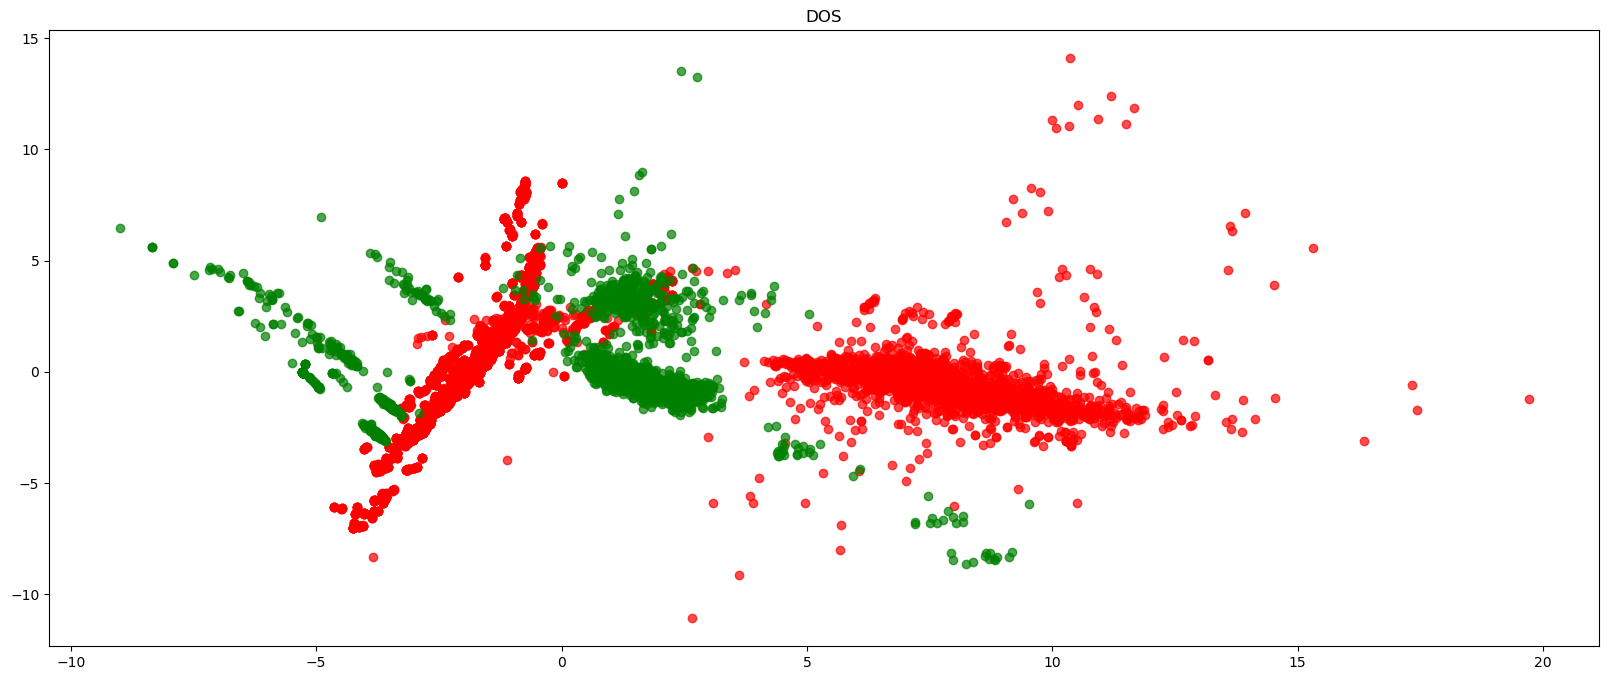

In [92]:
pca_187_to_2d = PCA(n_components=2)
dos_187_to_2d = pca_187_to_2d.fit_transform(df_dos_encoded_scaled)

norm_187_to_2d = pca_187_to_2d.fit_transform(df_norm_encoded_scaled)

inf_loss = 1- pca_187_to_2d.explained_variance_ratio_.sum()
print(f'inf loss: {inf_loss:2%}')

plt.figure(figsize=(20, 8))
plt.scatter(dos_187_to_2d[:, 0], dos_187_to_2d[:, 1], alpha=0.7, c='red')
plt.scatter(norm_187_to_2d[:, 0], norm_187_to_2d[:, 1], alpha=0.7, c='green')

plt.title('DOS')

plt.show()

# pca worms without 'attack_cat', 'label'

inf loss: 75.440982%


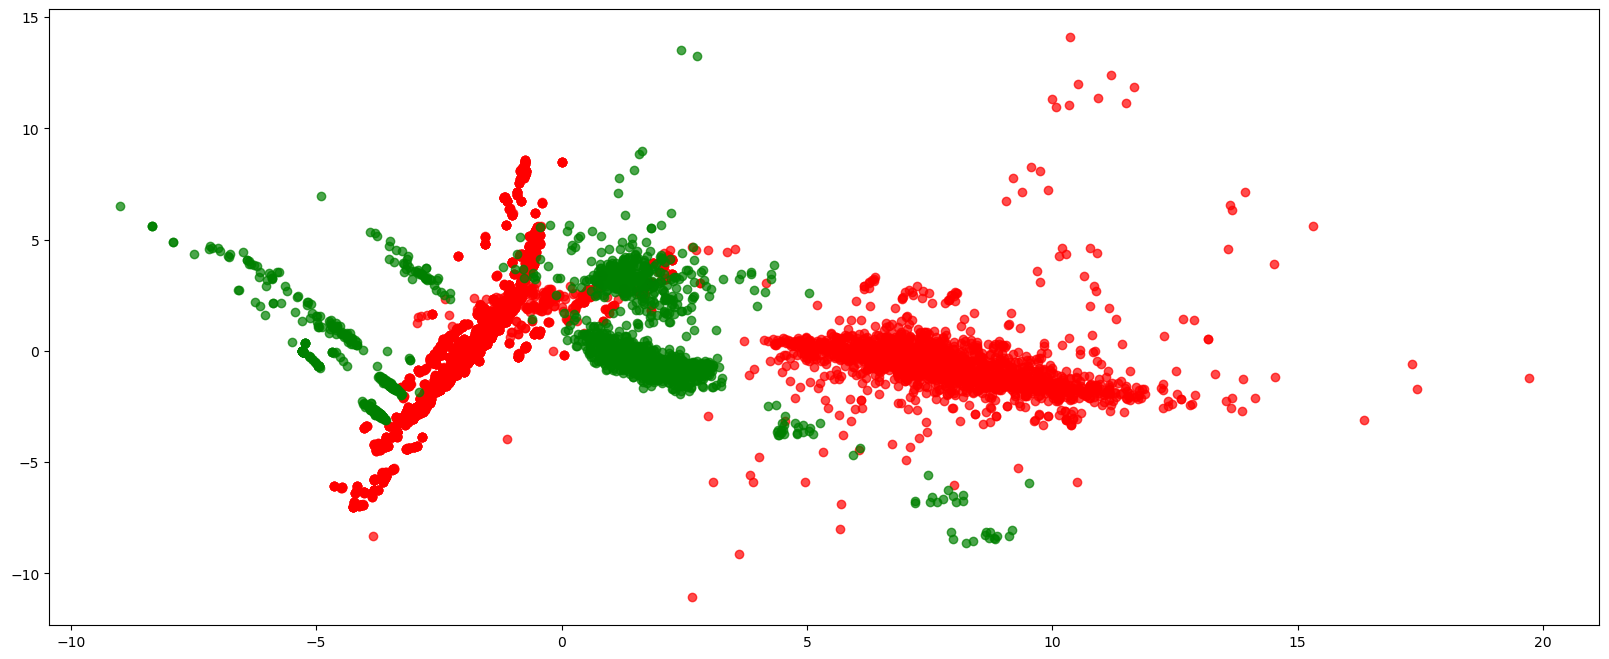

In [89]:
df_worms = df_train[df_train['attack_cat']=='Worms'].drop(columns=['attack_cat', 'label'])

df_dos_encoded = pd.get_dummies(df_dos, columns=categorical_columns)
scaler = StandardScaler()
df_worms_encoded_scaled = scaler.fit_transform(df_dos_encoded)

pca_187_to_2d = PCA(n_components=2)
worms_187_to_2d = pca_187_to_2d.fit_transform(df_worms_encoded_scaled)

norm_187_to_2d = pca_187_to_2d.fit_transform(df_norm_encoded_scaled)

inf_loss = 1- pca_187_to_2d.explained_variance_ratio_.sum()
print(f'inf loss: {inf_loss:2%}')

plt.figure(figsize=(20, 8))
plt.scatter(worms_187_to_2d[:, 0], worms_187_to_2d[:, 1], alpha=0.7, c='red')
plt.scatter(norm_187_to_2d[:, 0], norm_187_to_2d[:, 1], alpha=0.7, c='green')

plt.title('worms')

plt.show()

# Worms

inf loss: 75.440982%


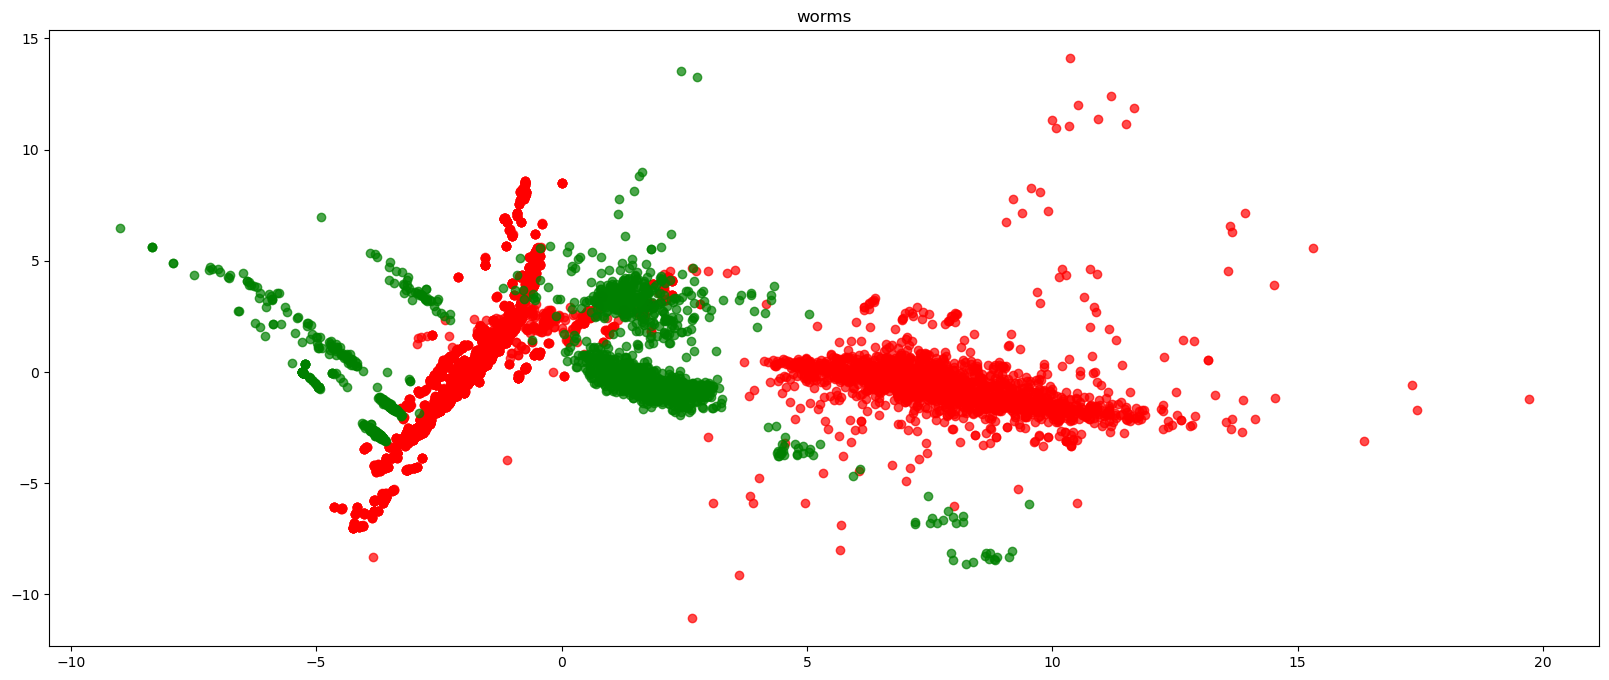

In [100]:
df_worms = df_train[df_train['attack_cat']=='Worms']
df_dos_encoded = pd.get_dummies(df_dos, columns=categorical_columns)
scaler = StandardScaler()
df_worms_encoded_scaled = scaler.fit_transform(df_dos_encoded)

pca_187_to_2d = PCA(n_components=2)
worms_187_to_2d = pca_187_to_2d.fit_transform(df_worms_encoded_scaled)

norm_187_to_2d = pca_187_to_2d.fit_transform(df_norm_encoded_scaled)

inf_loss = 1- pca_187_to_2d.explained_variance_ratio_.sum()
print(f'inf loss: {inf_loss:2%}')

plt.figure(figsize=(20, 8))
plt.scatter(worms_187_to_2d[:, 0], worms_187_to_2d[:, 1], alpha=0.7, c='red')
plt.scatter(norm_187_to_2d[:, 0], norm_187_to_2d[:, 1], alpha=0.7, c='green')

plt.title('worms')

plt.show()

# Analysis

inf loss: 75.440982%


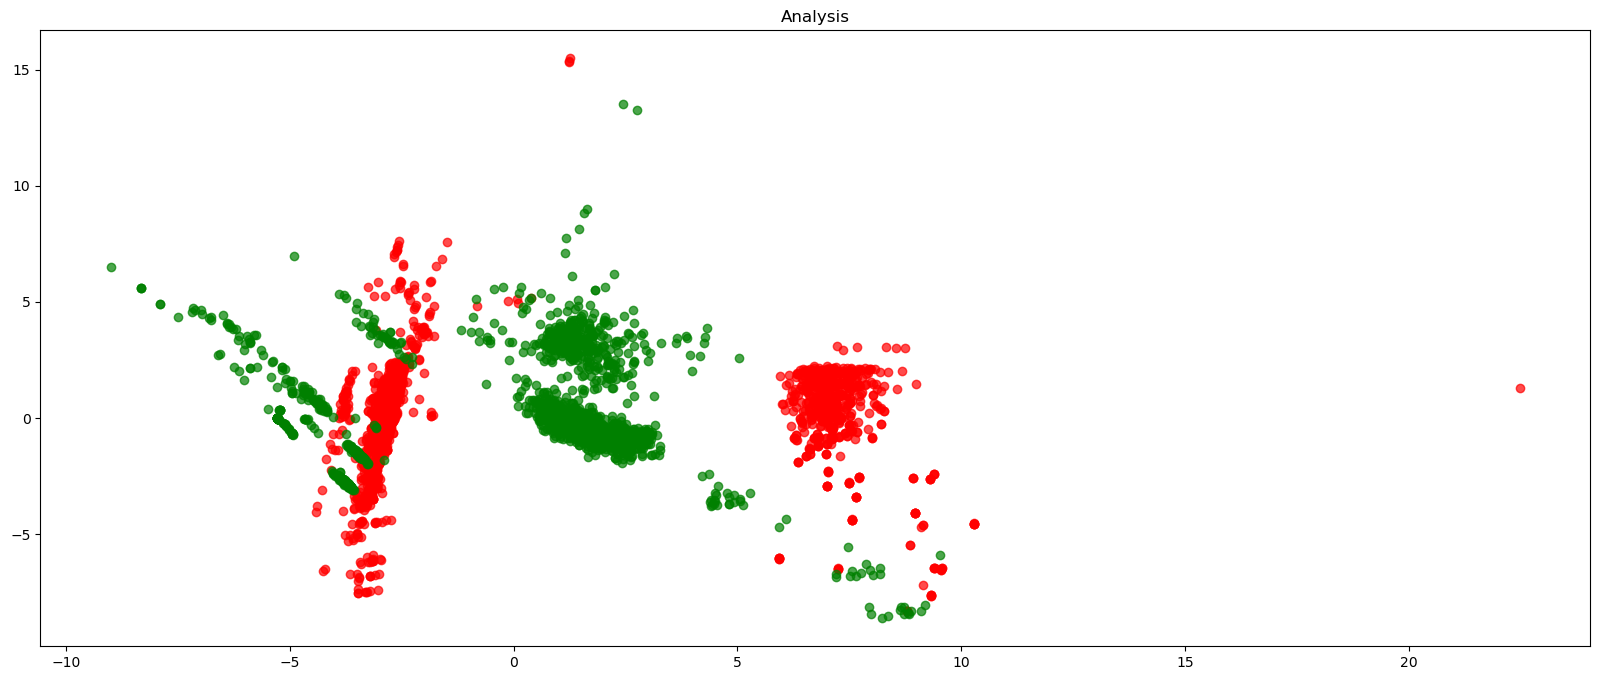

In [99]:
df_Analysis = df_train[df_train['attack_cat']=='Analysis']
df_Analysis_encoded = pd.get_dummies(df_Analysis, columns=categorical_columns)
scaler = StandardScaler()
df_Analysis_encoded_scaled = scaler.fit_transform(df_Analysis_encoded)

pca_187_to_2d = PCA(n_components=2)
Analysis_187_to_2d = pca_187_to_2d.fit_transform(df_Analysis_encoded_scaled)

norm_187_to_2d = pca_187_to_2d.fit_transform(df_norm_encoded_scaled)

inf_loss = 1- pca_187_to_2d.explained_variance_ratio_.sum()
print(f'inf loss: {inf_loss:2%}')

plt.figure(figsize=(20, 8))
plt.scatter(Analysis_187_to_2d[:, 0], Analysis_187_to_2d[:, 1], alpha=0.7, c='red')
plt.scatter(norm_187_to_2d[:, 0], norm_187_to_2d[:, 1], alpha=0.7, c='green')

plt.title('Analysis')

plt.show()

# Backdoor

inf loss: 75.440982%


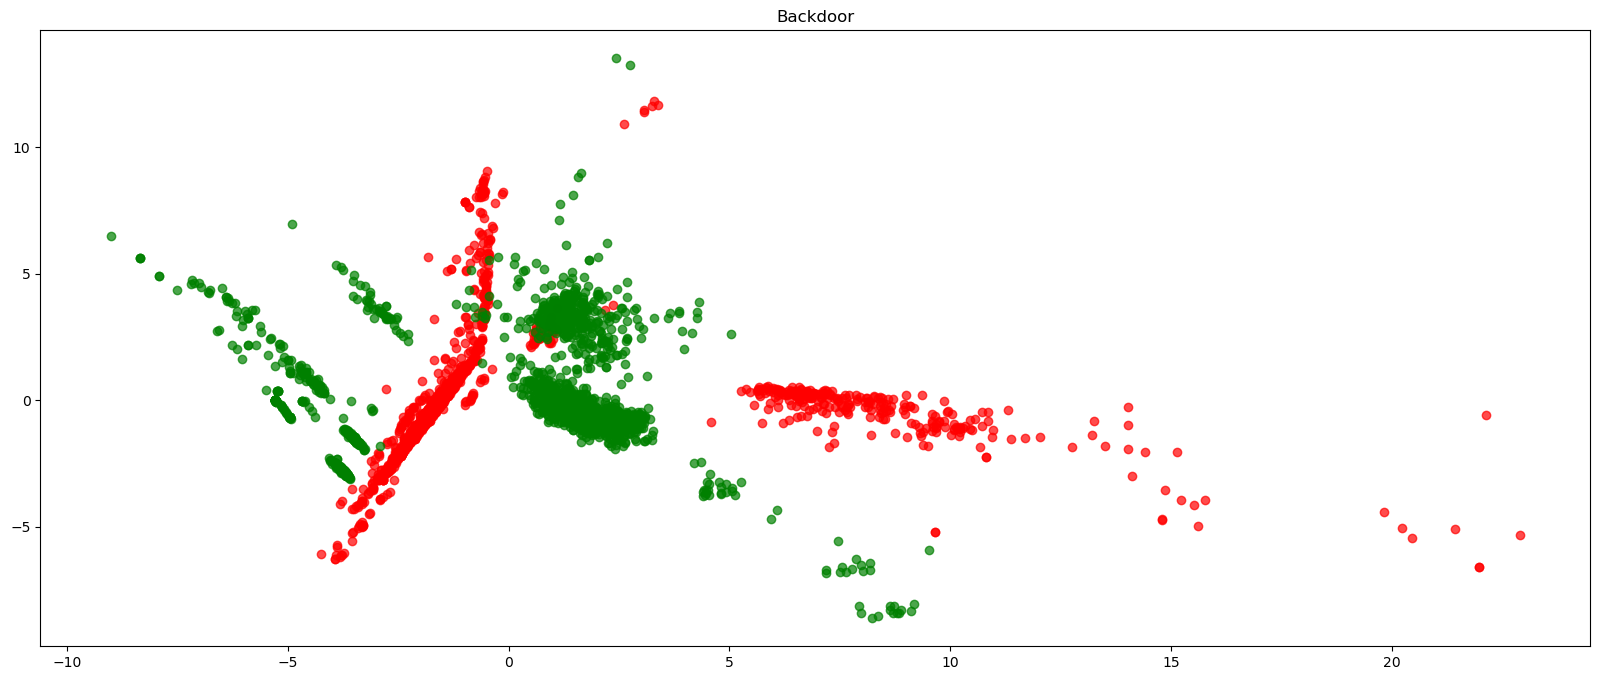

In [98]:
df_Backdoor = df_train[df_train['attack_cat']=='Backdoor']
df_Backdoor_encoded = pd.get_dummies(df_Backdoor, columns=categorical_columns)
scaler = StandardScaler()
df_Backdoor_encoded_scaled = scaler.fit_transform(df_Backdoor_encoded)

pca_187_to_2d = PCA(n_components=2)
Backdoor_187_to_2d = pca_187_to_2d.fit_transform(df_Backdoor_encoded_scaled)

norm_187_to_2d = pca_187_to_2d.fit_transform(df_norm_encoded_scaled)

inf_loss = 1- pca_187_to_2d.explained_variance_ratio_.sum()
print(f'inf loss: {inf_loss:2%}')

plt.figure(figsize=(20, 8))
plt.scatter(Backdoor_187_to_2d[:, 0], Backdoor_187_to_2d[:, 1], alpha=0.7, c='red')
plt.scatter(norm_187_to_2d[:, 0], norm_187_to_2d[:, 1], alpha=0.7, c='green')

plt.title('Backdoor')

plt.show()

# Exploits

inf loss: 75.440982%


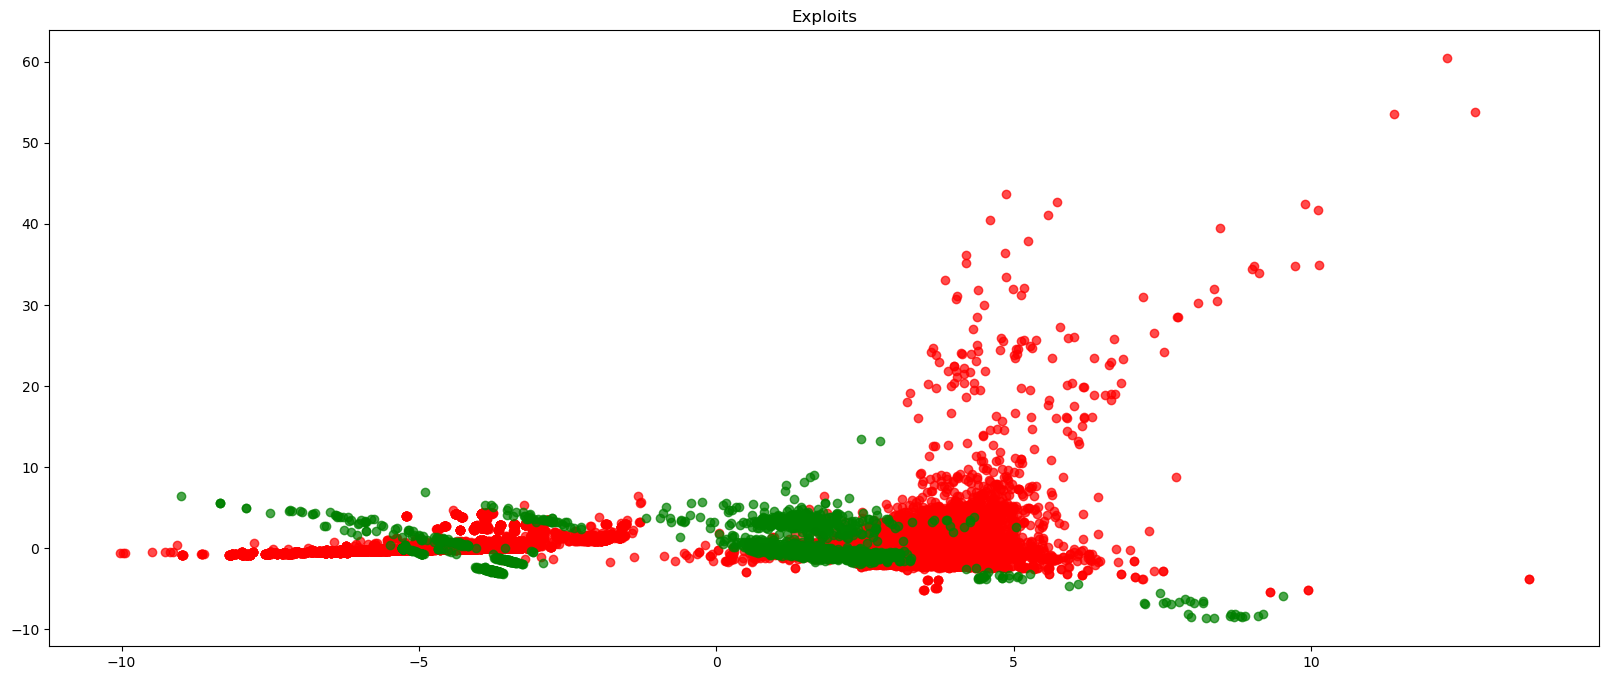

In [97]:
df_Exploits = df_train[df_train['attack_cat']=='Exploits']
df_Exploits_encoded = pd.get_dummies(df_Exploits, columns=categorical_columns)
scaler = StandardScaler()
df_Exploits_encoded_scaled = scaler.fit_transform(df_Exploits_encoded)

pca_187_to_2d = PCA(n_components=2)
Exploits_187_to_2d = pca_187_to_2d.fit_transform(df_Exploits_encoded_scaled)

norm_187_to_2d = pca_187_to_2d.fit_transform(df_norm_encoded_scaled)

inf_loss = 1- pca_187_to_2d.explained_variance_ratio_.sum()
print(f'inf loss: {inf_loss:2%}')

plt.figure(figsize=(20, 8))
plt.scatter(Exploits_187_to_2d[:, 0], Exploits_187_to_2d[:, 1], alpha=0.7, c='red')
plt.scatter(norm_187_to_2d[:, 0], norm_187_to_2d[:, 1], alpha=0.7, c='green')

plt.title('Exploits')

plt.show()

# Fuzzers

inf loss: 75.440982%


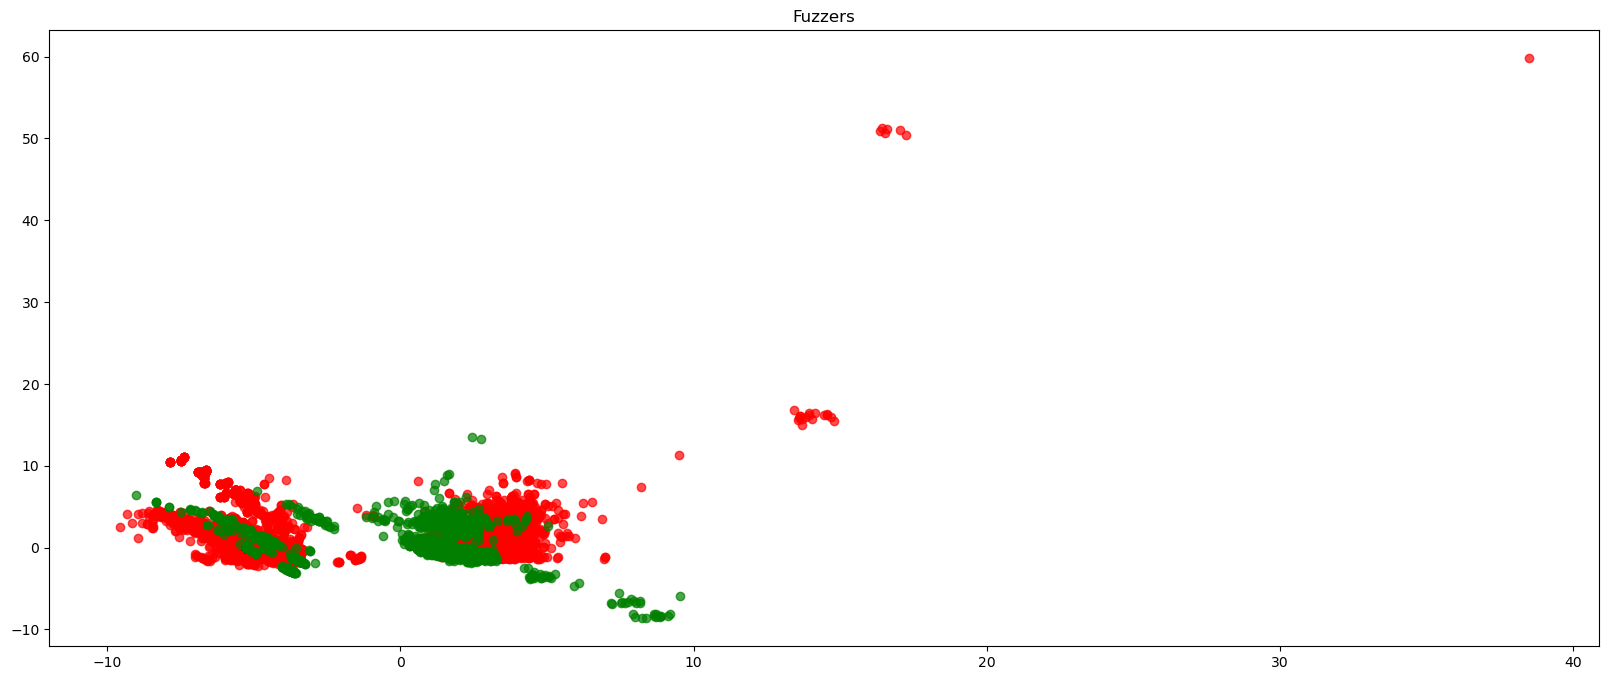

In [96]:
df_Fuzzers = df_train[df_train['attack_cat']=='Fuzzers']
df_Fuzzers_encoded = pd.get_dummies(df_Fuzzers, columns=categorical_columns)
scaler = StandardScaler()
df_Fuzzers_encoded_scaled = scaler.fit_transform(df_Fuzzers_encoded)

pca_187_to_2d = PCA(n_components=2)
Fuzzers_187_to_2d = pca_187_to_2d.fit_transform(df_Fuzzers_encoded_scaled)

norm_187_to_2d = pca_187_to_2d.fit_transform(df_norm_encoded_scaled)

inf_loss = 1- pca_187_to_2d.explained_variance_ratio_.sum()
print(f'inf loss: {inf_loss:2%}')

plt.figure(figsize=(20, 8))
plt.scatter(Fuzzers_187_to_2d[:, 0], Fuzzers_187_to_2d[:, 1], alpha=0.7, c='red')
plt.scatter(norm_187_to_2d[:, 0], norm_187_to_2d[:, 1], alpha=0.7, c='green')

plt.title('Fuzzers')

plt.show()

# Generic

inf loss: 75.440982%


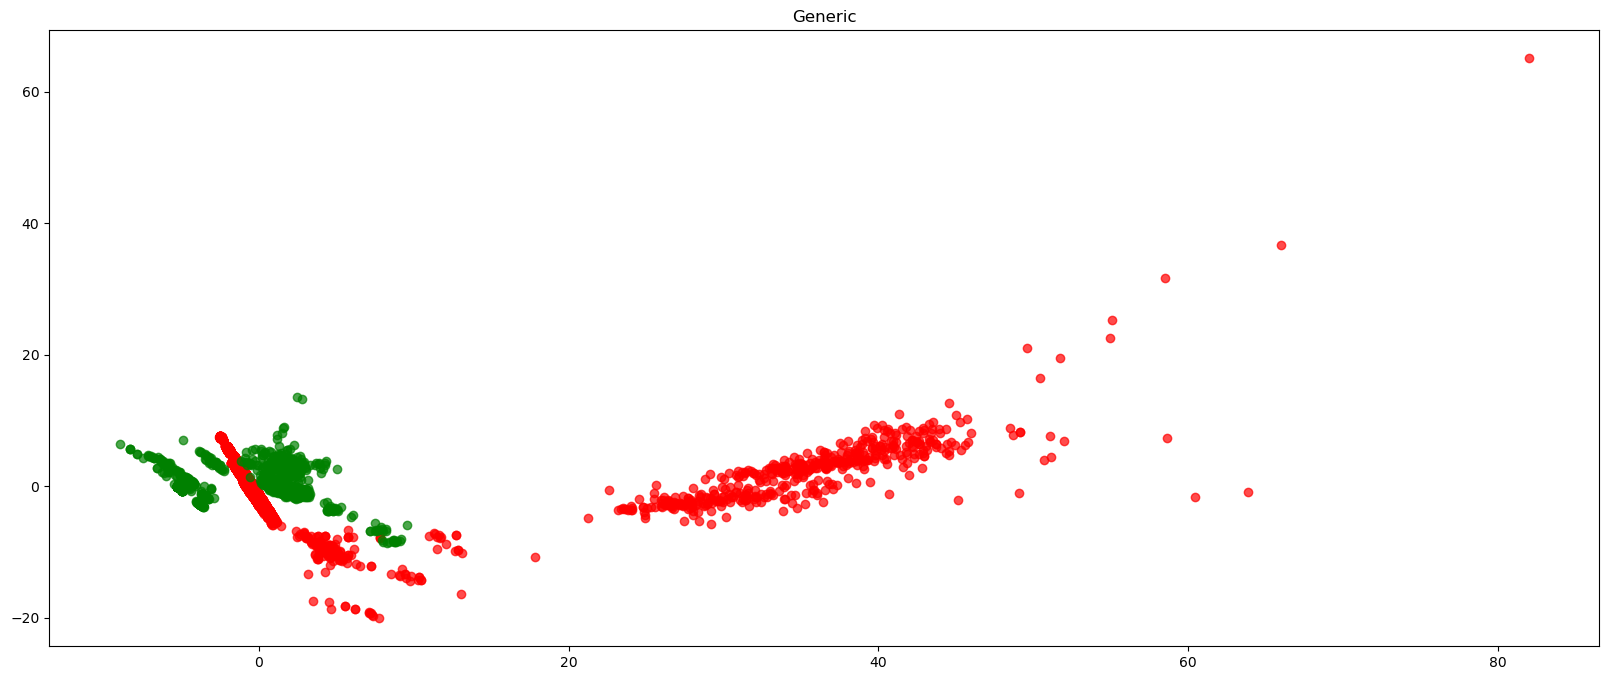

In [95]:
df_Generic = df_train[df_train['attack_cat']=='Generic']
df_Generic_encoded = pd.get_dummies(df_Generic, columns=categorical_columns)
scaler = StandardScaler()
df_Generic_encoded_scaled = scaler.fit_transform(df_Generic_encoded)

pca_187_to_2d = PCA(n_components=2)
Generic_187_to_2d = pca_187_to_2d.fit_transform(df_Generic_encoded_scaled)

norm_187_to_2d = pca_187_to_2d.fit_transform(df_norm_encoded_scaled)

inf_loss = 1- pca_187_to_2d.explained_variance_ratio_.sum()
print(f'inf loss: {inf_loss:2%}')

plt.figure(figsize=(20, 8))
plt.scatter(Generic_187_to_2d[:, 0], Generic_187_to_2d[:, 1], alpha=0.7, c='red')
plt.scatter(norm_187_to_2d[:, 0], norm_187_to_2d[:, 1], alpha=0.7, c='green')

plt.title('Generic')

plt.show()

# Reconnaissance

inf loss: 75.440982%


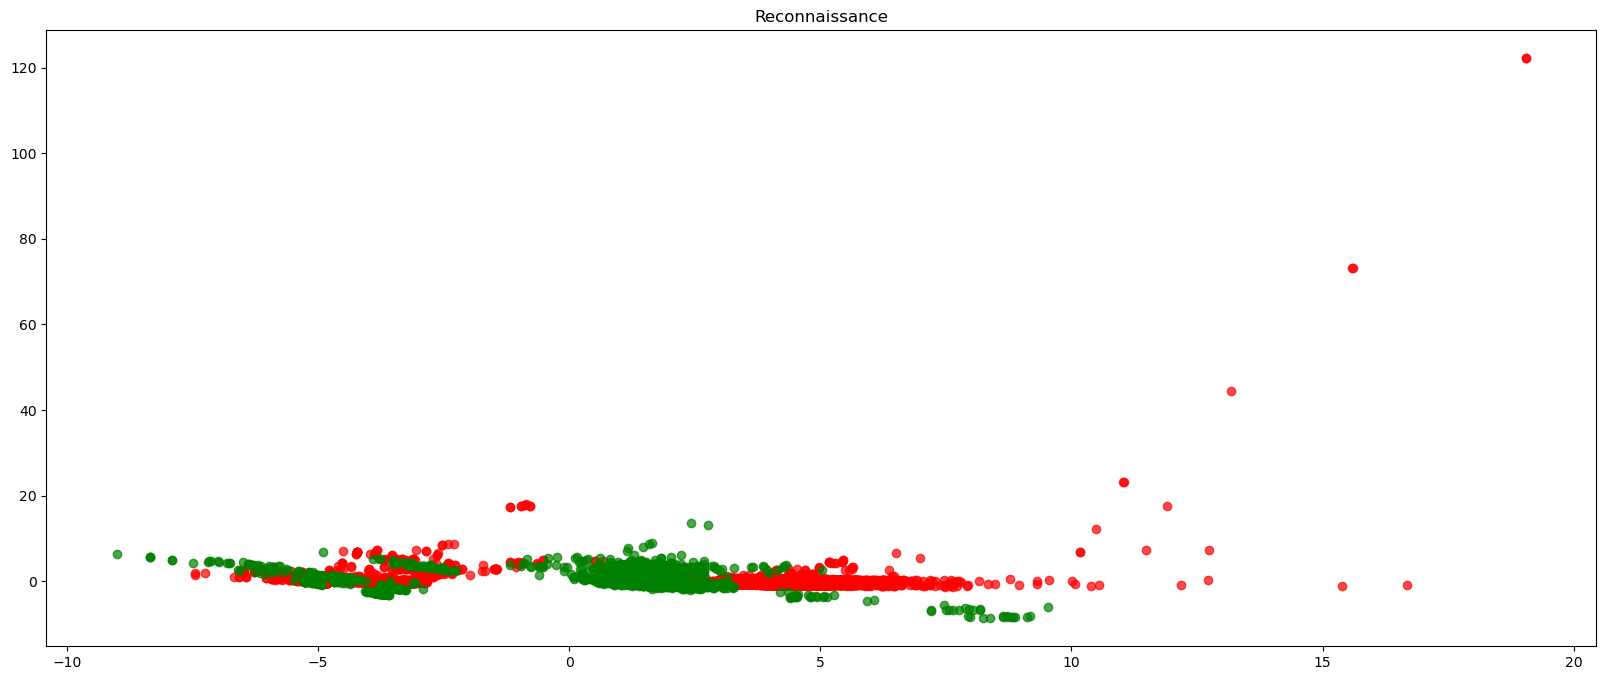

In [94]:
df_Reconnaissance = df_train[df_train['attack_cat']=='Reconnaissance']
df_Reconnaissance_encoded = pd.get_dummies(df_Reconnaissance, columns=categorical_columns)
scaler = StandardScaler()
df_Reconnaissance_encoded_scaled = scaler.fit_transform(df_Reconnaissance_encoded)

pca_187_to_2d = PCA(n_components=2)
Reconnaissance_187_to_2d = pca_187_to_2d.fit_transform(df_Reconnaissance_encoded_scaled)

norm_187_to_2d = pca_187_to_2d.fit_transform(df_norm_encoded_scaled)

inf_loss = 1- pca_187_to_2d.explained_variance_ratio_.sum()
print(f'inf loss: {inf_loss:2%}')

plt.figure(figsize=(20, 8))
plt.scatter(Reconnaissance_187_to_2d[:, 0], Reconnaissance_187_to_2d[:, 1], alpha=0.7, c='red')
plt.scatter(norm_187_to_2d[:, 0], norm_187_to_2d[:, 1], alpha=0.7, c='green')

plt.title('Reconnaissance')

plt.show()

# Shellcode

inf loss: 75.440982%


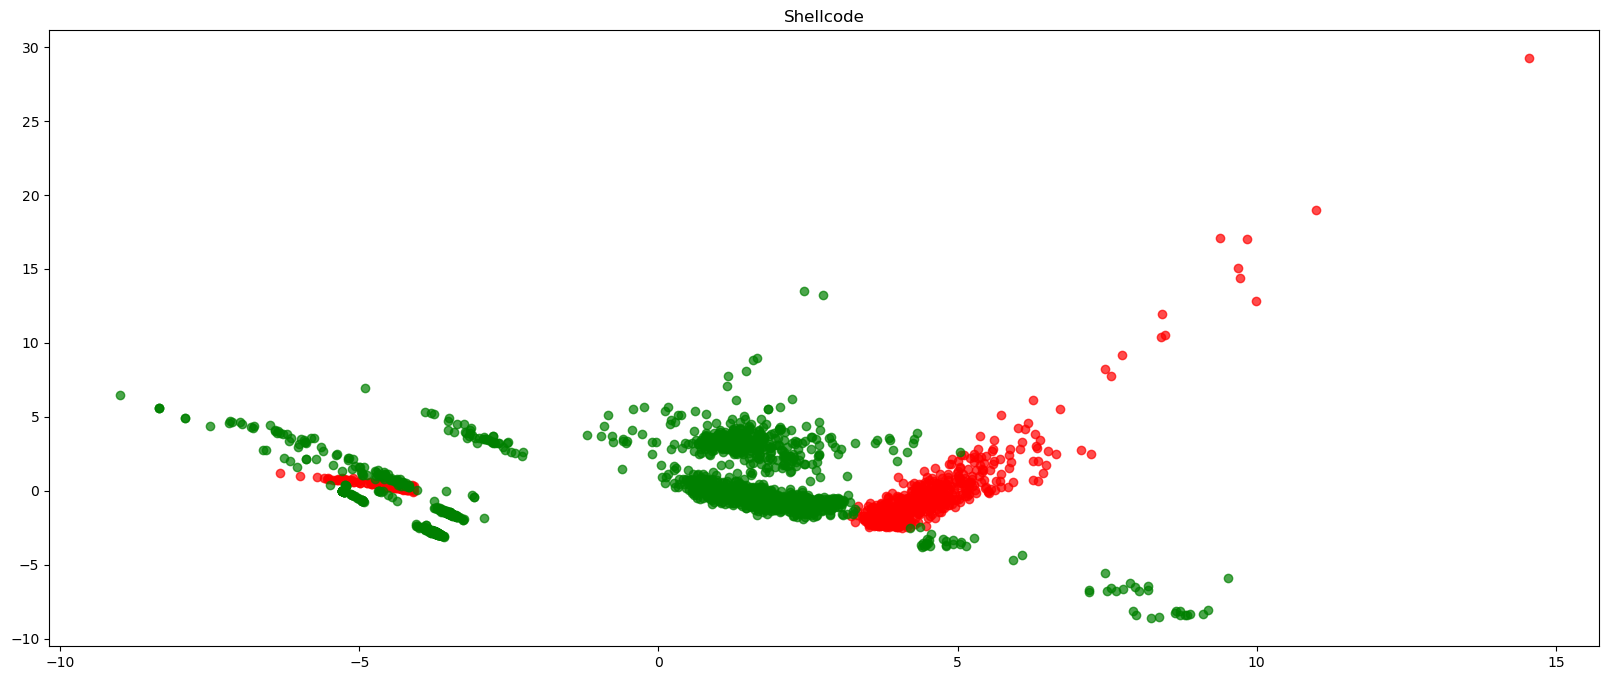

In [93]:
df_Shellcode = df_train[df_train['attack_cat']=='Shellcode']
df_Shellcode_encoded = pd.get_dummies(df_Shellcode, columns=categorical_columns)
scaler = StandardScaler()
df_Shellcode_encoded_scaled = scaler.fit_transform(df_Shellcode_encoded)

pca_187_to_2d = PCA(n_components=2)
Shellcode_187_to_2d = pca_187_to_2d.fit_transform(df_Shellcode_encoded_scaled)

norm_187_to_2d = pca_187_to_2d.fit_transform(df_norm_encoded_scaled)

inf_loss = 1- pca_187_to_2d.explained_variance_ratio_.sum()
print(f'inf loss: {inf_loss:2%}')

plt.figure(figsize=(20, 8))
plt.scatter(Shellcode_187_to_2d[:, 0], Shellcode_187_to_2d[:, 1], alpha=0.7, c='red')
plt.scatter(norm_187_to_2d[:, 0], norm_187_to_2d[:, 1], alpha=0.7, c='green')

plt.title('Shellcode')

plt.show()